In [1]:
from utils import ComputeClient
import pandas as pd
from typing import Any
import time
import matplotlib.pyplot as plt
import seaborn as sns

To successfully run this notebook you need a running **inference server**<br>
You can find information on how to do this at /inference_server/readme.md

In [2]:
tested_batch_sizes = list(range(1, 51))
max_output_seq_len = 16
temperature = 0 # disable sampling for consistent outputs across all batches

In [3]:
def split_into_batches(input_list:list[Any], batch_size:int) -> list[list[Any]]:
    """
    Splits a list into smaller lists (batches) of a specified size.

    :param input_list: The list to be split into batches.
    :param batch_size: The maximum size of each batch.
    :return: A list of batches, where each batch is a list containing up to batch_size elements from input_list.
    """
    return [input_list[i:i + batch_size] for i in range(0, len(input_list), batch_size)]

In [4]:
def prepare_batch_elements_for_client(batched_elements: list[list[dict[str, str]]]) -> tuple[list[str], list[str]]:
    """
    Extracts system instructions and user prompts from a batch of input elements.

    Each inner list in `batched_elements` is expected to contain exactly two dictionaries:
    - The first dictionary (with role 'system') holds the instruction or behavior definition.
    - The second dictionary (with role 'user') contains the actual prompt or question.

    :param batched_elements: A list of batches, where each batch is a list containing two dictionaries
                             with keys 'role' and 'content', representing a system-user message pair.
    :return: A tuple containing two lists:
             - The first list contains the 'content' strings from system-role dictionaries (behaviors).
             - The second list contains the 'content' strings from user-role dictionaries (prompts).
    """
    behaviours = [elem[0]['content'] for elem in batched_elements]
    prompts = [elem[1]['content'] for elem in batched_elements]
    return behaviours, prompts


In [5]:
client = ComputeClient()

In [6]:
benchmark_data = pd.read_feather('../data/Benchmark/german_medical_exam_boolean_questions.feather')

In [7]:
benchmark_data.shape

(680, 5)

In [22]:
conversations = benchmark_data['conversation'].tolist()
prompts = [data[:-1].tolist() for data in conversations]


In [23]:
num_total_prompts = len(prompts)
data = {'batch_size': [], 'number_of_total_batches': [], 'total_processing_time': [], 'average_time_per_batch': [], 'average_time_per_prompt': []}
for current_batch_size in tested_batch_sizes:
    batches = split_into_batches(prompts, current_batch_size)
    batches = [prepare_batch_elements_for_client(batch) for batch in batches]
    batch_times = []
    start_time = time.time()
    for batch in batches:
        start_time_batch = time.time()
        client.call_llm(batch[0], batch[1], parameters= {'temperature': temperature, 'max_new_tokens': max_output_seq_len})
        end_time_batch = time.time()
        batch_times.append(end_time_batch - start_time_batch)
    end_time = time.time()
    total_time_taken = end_time - start_time
    data['batch_size'].append(current_batch_size)
    data['number_of_total_batches'].append(len(batches))
    data['total_processing_time'].append(end_time - start_time)
    data['average_time_per_batch'].append(sum(batch_times) / len(batch_times))
    data['average_time_per_prompt'].append( total_time_taken / num_total_prompts)

Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending request to LLM
Sending req

In [24]:
df_batching_efficiency = pd.DataFrame(data)

In [26]:
df_batching_efficiency

,batch_size,number_of_total_batches,total_processing_time,average_time_per_batch,average_time_per_prompt
0,1,680,144.887902,0.213065,0.213070
1,2,340,78.968295,0.232252,0.116130
2,3,227,57.947469,0.255268,0.085217
3,4,170,45.725640,0.268962,0.067244
4,5,136,48.690557,0.358007,0.071604
5,6,114,37.865508,0.332149,0.055685
6,7,98,34.161343,0.348585,0.050237
7,8,85,30.444665,0.358166,0.044772
8,9,76,28.775689,0.378614,0.042317
9,10,68,28.573421,0.420182,0.042020


In [25]:
df_batching_efficiency.to_feather('batching_efficiency_results.feather')

In [5]:
df_batching_efficiency = pd.read_feather('batching_efficiency_results.feather')

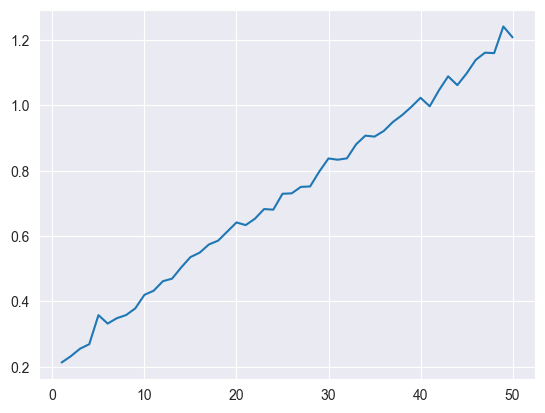

In [6]:
plt.plot(df_batching_efficiency['batch_size'], df_batching_efficiency['average_time_per_batch'])

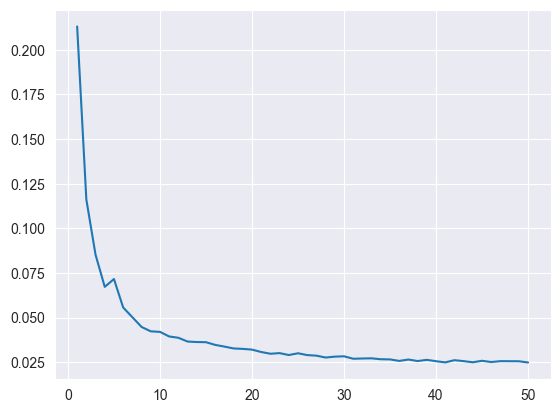

In [7]:
plt.plot(df_batching_efficiency['batch_size'], df_batching_efficiency['average_time_per_prompt'])

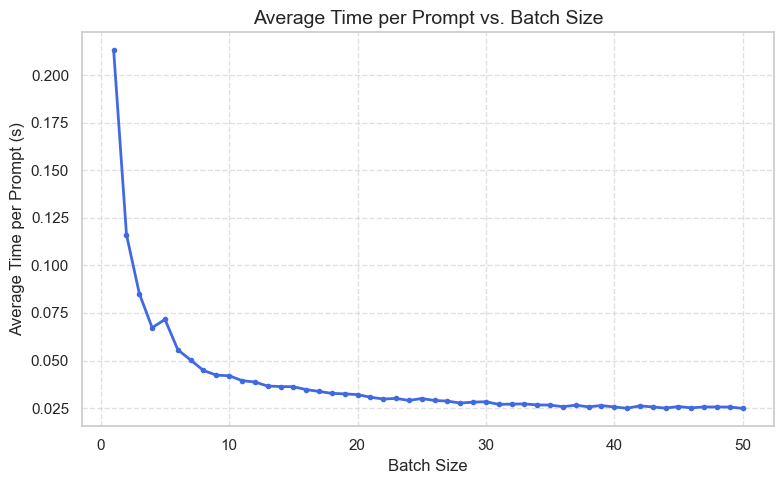

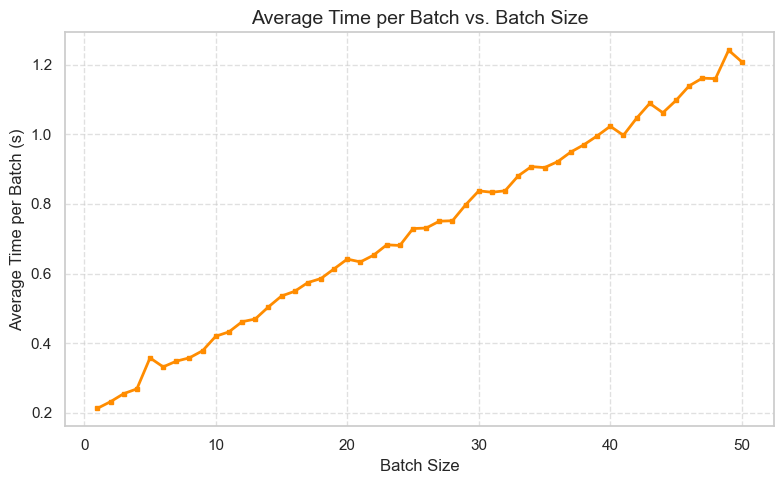

In [18]:
# Optional: use seaborn styling for prettier defaults
sns.set(style="whitegrid")

# First Plot: Average Time per Prompt
plt.figure(figsize=(8, 5))
plt.plot(
    df_batching_efficiency['batch_size'],
    df_batching_efficiency['average_time_per_prompt'],
    marker='o',
    color='royalblue',
    linewidth=2,
    markersize=3,
)
plt.title("Average Time per Prompt vs. Batch Size", fontsize=14)
plt.xlabel("Batch Size", fontsize=12)
plt.ylabel("Average Time per Prompt (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/average_prompt_time_per_batch_size.png")
plt.show()

# Second Plot: Average Time per Batch
plt.figure(figsize=(8, 5))
plt.plot(
    df_batching_efficiency['batch_size'],
    df_batching_efficiency['average_time_per_batch'],
    marker='s',
    color='darkorange',
    linewidth=2,
    markersize=3,
)
plt.title("Average Time per Batch vs. Batch Size", fontsize=14)
plt.xlabel("Batch Size", fontsize=12)
plt.ylabel("Average Time per Batch (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/average_batch_time_per_batch_size.png")
plt.show()
